# Code Samples for Planet Hunting Tech Stack

This notebook holds a collection of working examples of the different packages, resources, etc. that were used for this project. The goal of this notebook is to provide a quick refresher on the various technologies and resources that were used for this project in order so that the viewer can jump back into the project even after a long break. It also serves as a means for outlining the steps taken to develop the model. 

**Pending Questions:**

* what does quarter refer to in the Kepler Catalogue?
* pixel files for KIC 3448731 located at https://archive.stsci.edu/missions/kepler/target_pixel_files/0034/003448731/ . what does the 0034 folder refer to?
* why do some KIC's not work, like: 

## Data (Kepler & TESS)

**Kepler Data**
https://archive.stsci.edu/missions/kepler/target_pixel_files/

*File Structure*





**TESS Data**
https://tev.mit.edu/data/collection/193/ 


### TPFs [from lightkurve](https://docs.lightkurve.org/tutorials/01-target-pixel-files.html)
Target Pixel Files are a file common to Kepler/K2 and the TESS mission. They contain movies of the pixel data centered on a single target star - given in FITS tiles.

**Terms:**

**TPFs** - Stacks of images with one imaper per timestamp of the telesctope's data capture. 
**Cadence** - Each timestamp that the telescope in question took data


## Lightkurve

**Use:**  [Lightkurve](https://docs.lightkurve.org/) is a package for Kepler and TESS time series analysis in Python. Lightkurve offers a user-friendly way to analyze time series data obtained by telescopes, in particular NASA’s Kepler and TESS exoplanet missions. It is used in this project to handle the light curve data from Kepler and TESS.



**Installation: depending on your package-managent system of choice**

```python
pip install lightkurve 
```

Or:

```python
conda install --channel conda-forge lightkurve
```


In [3]:
# import the package
import lightkurve as lk

Example (from the Quickstart guide) using Kepler data

**Star: KIC 8462852**

In [15]:
from lightkurve import search_targetpixelfile
pixelfile = search_targetpixelfile('KIC 8462852', quarter=16).download(quality_bitmask='hardest');

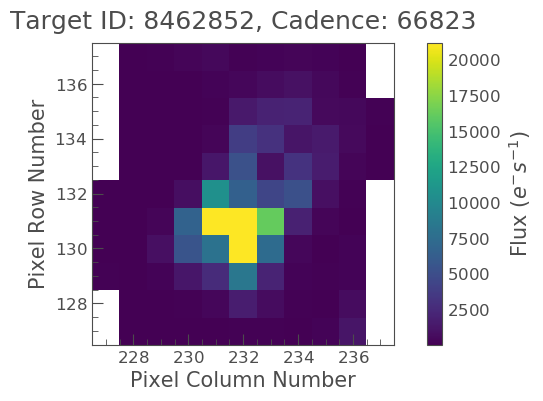

In [5]:
pixelfile.plot(frame=100)

In [6]:
# the star is an isolated object, 
# so we can extract a lightcurve by simply summing up all the pixel values in each image
lightcurve = pixelfile.to_lightcurve(aperture_mask='all')
# This returns a KeplerLightCurve object --> gives us access to flux over time (both as arrays)
# time unit is days, flux uinit is electrons/second

In [7]:
#Time
lightcurve.time

array([1472.11777934, 1472.13821223, 1472.15864492, ..., 1557.89718798,
       1557.9380561 , 1557.95849016])

In [8]:
# flux ==> electrons/second
lightcurve.flux

array([258645.03, 258660.05, 258690.08, ..., 258929.86, 258884.66,
       258865.6 ], dtype=float32)

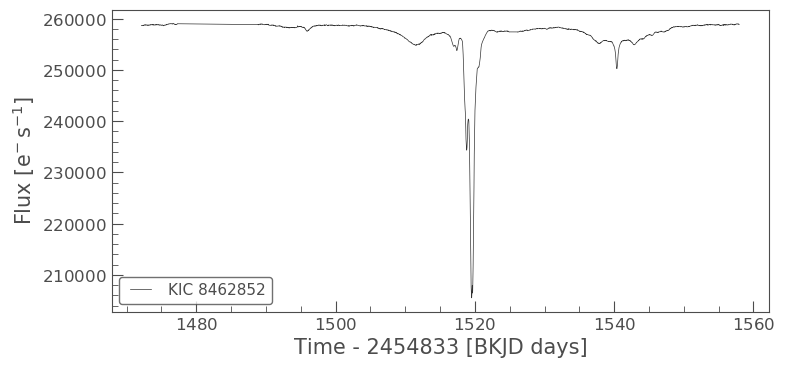

In [9]:
# plotting the light curve
lightcurve.plot()

TESS Data Example:
**Star: TIC 176860064** *(WIP)*

In [13]:
pixelfile = search_targetpixelfile('8462852', quarter=16).download(quality_bitmask='hardest');

In [ ]:
pixelfile.plot(frame=100)

```KeplerTargetPixelFile```  deals with data from the Kepler and K2 mission
```TessTargetPixelFile``` deals with data from the TESS mission




In [24]:
# put the URL (local or remote) to get the TPF file for the selected Kepler star
from lightkurve import KeplerTargetPixelFile
keptpf = KeplerTargetPixelFile("https://archive.stsci.edu/pub/kepler/target_pixel_files/0069/006922244/kplr006922244-2010078095331_lpd-targ.fits.gz")

# another way to do the same thing is to use the search_targetpixelfile() function
from lightkurve import search_targetpixelfile
keptpf2 = search_targetpixelfile('KIC 6922244', quarter=4).download()
# This searches for the file in the MAST data archive ==> with both Kepler and K2 data
#Kepler ID(KIC) 6922244 for Quarter 4 (Kepler’s observations were split into quarters of a year)

#Note: name of the target or its astronomical coordinates can be parameter to the function

In [25]:
keptpf

KeplerTargetPixelFile Object (ID: 6922244)

In [26]:
keptpf2

KeplerTargetPixelFile Object (ID: 6922244)

In [27]:
# Meta data available:
keptpf.quarter

4

In [28]:
keptpf2.mission

'Kepler'

In [31]:
print(keptpf.time) # this is in Barycentric Kepler Julian Day format (BKJD)

[352.37632485 352.39675805 352.43762445 ... 442.16263546 442.18306983
 442.2035041 ]


In [33]:
# getting the AstroPyTime - in Solar System barycentric frame (TDB) 
keptpf2.astropy_time
# TDB does not include corrections for light travel time or leap seconts

<Time object: scale='tdb' format='jd' value=[2455185.37632485 2455185.39675805 2455185.43762445 ... 2455275.16263546
 2455275.18306983 2455275.2035041 ]>

In [34]:
# Using the Earth-Centered UTC time:
keptpf.astropy_time.utc.iso

array(['2009-12-19 21:00:48.283', '2009-12-19 21:30:13.712',
       '2009-12-19 22:29:04.569', ..., '2010-03-19 15:53:05.518',
       '2010-03-19 16:22:31.048', '2010-03-19 16:51:56.568'], dtype='<U23')

In [35]:
# Accessing the actual image data
keptpf.flux.shape
# (4116,5,5) => 4116x5x5 array in units electrons/second. First axis is time, and each image is 5 pixels by 5 pixels

(4116, 5, 5)

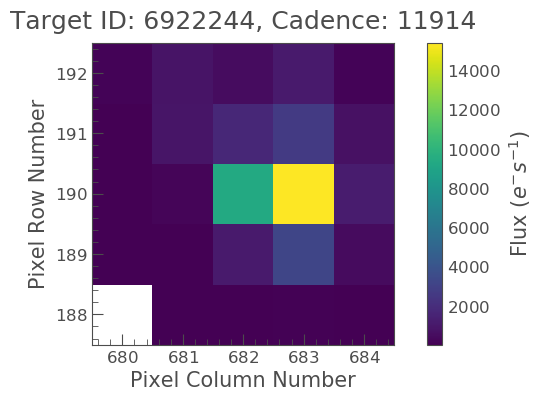

In [38]:
# by default, it plots just one cadence. specify the cadence you want with frame
%matplotlib inline
keptpf.plot(frame=0);

In [40]:
# accessing the values of this image in array
keptpf.flux[0]

array([[          nan, 5.6079335e+00, 5.1491142e+01, 8.4241745e+01,
        3.0221334e+01],
       [4.4045620e+01, 7.6861229e+01, 1.1227759e+03, 3.2262029e+03,
        4.5486777e+02],
       [2.5911165e+01, 2.2907593e+02, 9.3626543e+03, 2.3606273e+04,
        1.2087750e+03],
       [4.0100830e+01, 8.8543927e+02, 1.7102118e+03, 2.6254871e+03,
        7.0796606e+02],
       [1.5719417e+02, 8.3713440e+02, 5.1021539e+02, 1.1501041e+03,
        1.8313370e+02]], dtype=float32)

**Another example with the Kepler data**

KIC 3448731

In [2]:
from lightkurve import search_targetpixelfile

kplr2 = search_targetpixelfile('KIC 3448731', quarter=1).download()